✅ Dataset created and saved as 'food_order_dataset.csv'
      Location Time_of_Day Previous_Order Preferred_Cuisine Order_Frequency  \
0     Downtown     Morning       Sandwich           Chinese             Low   
1       Uptown   Afternoon       Sandwich           Italian            High   
2  City Center     Morning          Pizza           Italian             Low   
3     Downtown   Afternoon       Sandwich          American             Low   
4      Suburbs     Morning         Burger          American          Medium   

  Food_Item  
0     Salad  
1     Pizza  
2     Pizza  
3  Sandwich  
4  Sandwich  


/tmp/ipython-input-2862840011.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Food_Item', order=df['Food_Item'].value_counts().index, palette='Set2')


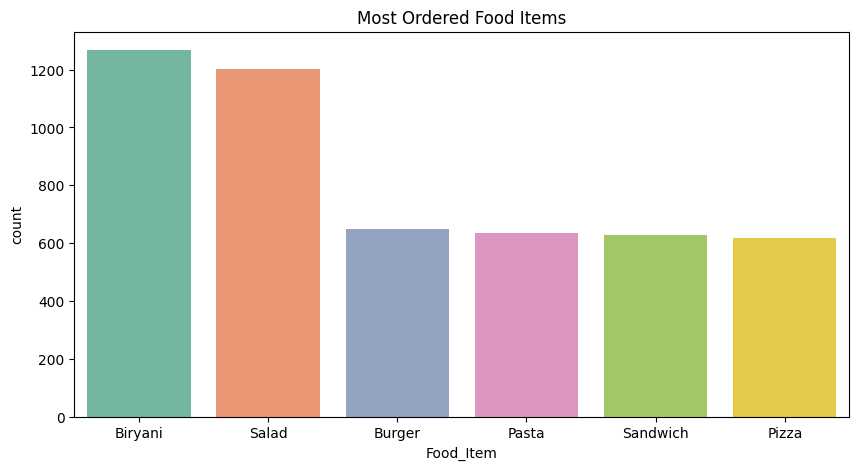

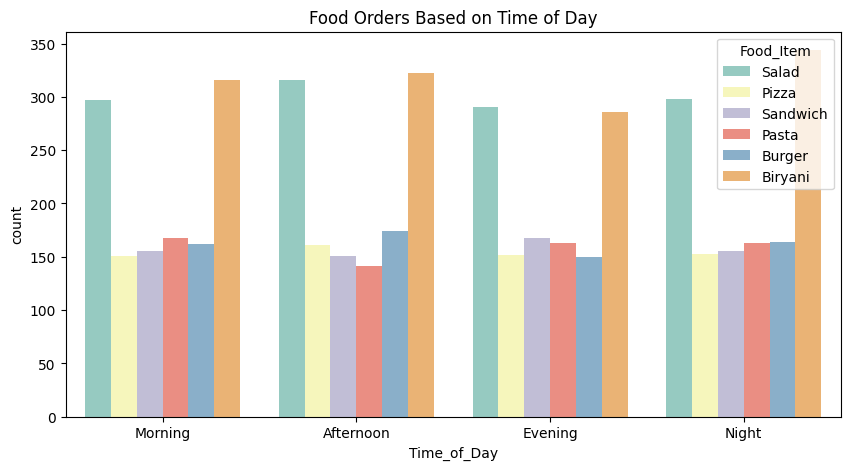

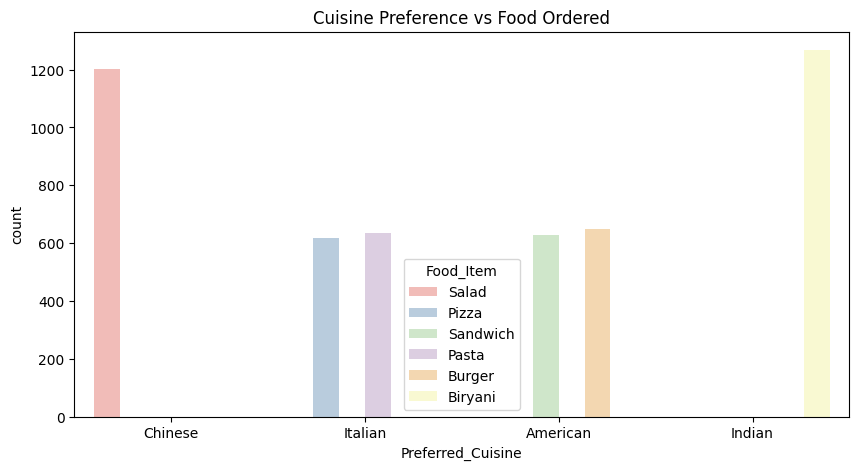

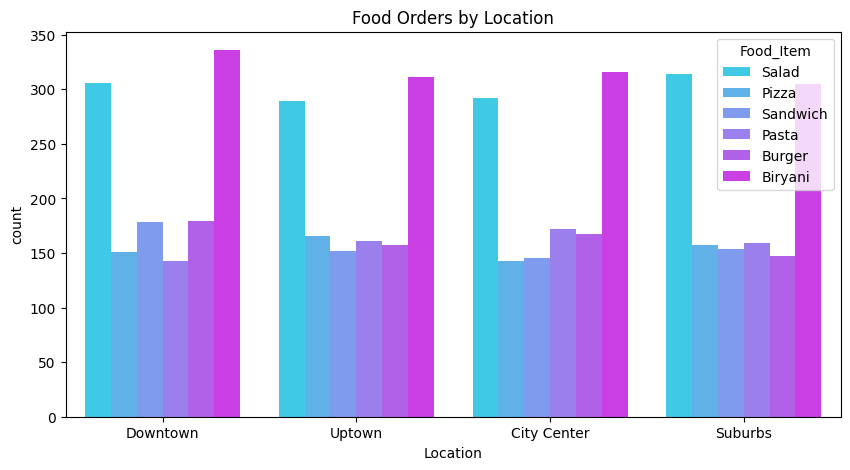


🎯 Random Forest Model Accuracy: 75.0 %

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       248
           1       0.55      0.50      0.53       131
           2       0.52      0.53      0.53       137
           3       0.50      0.48      0.49       131
           4       1.00      1.00      1.00       234
           5       0.50      0.55      0.53       119

    accuracy                           0.75      1000
   macro avg       0.68      0.68      0.68      1000
weighted avg       0.75      0.75      0.75      1000



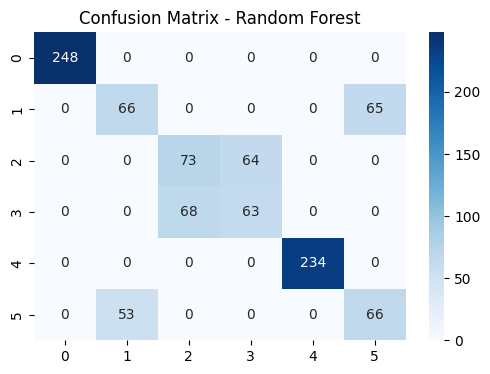

/tmp/ipython-input-2862840011.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=importance.index, palette="viridis")


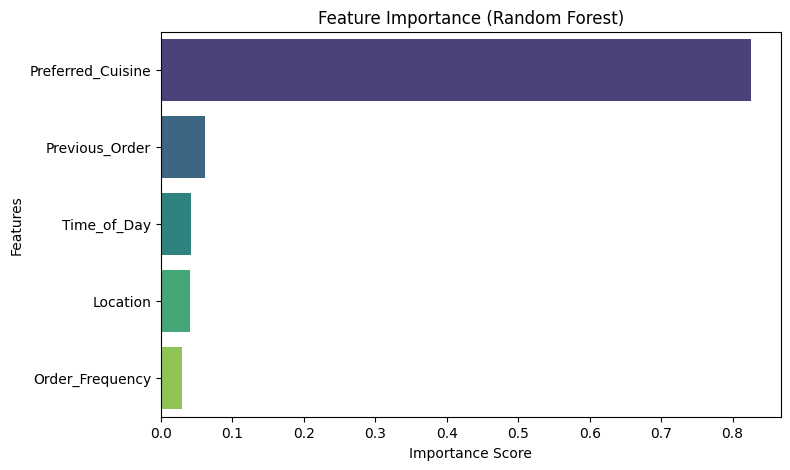


🍴 Enter New Customer Details to Predict Food Order:
Enter Location (Downtown / Uptown / Suburbs / City Center): Downtown
Enter Time of Day (Morning / Afternoon / Evening / Night): Morning
Enter Previous Order (Pizza / Burger / Salad / Biryani / Pasta / Sandwich): Pizza
Enter Preferred Cuisine (Italian / Indian / Chinese / American): Italian
Enter Order Frequency (Low / Medium / High): Low

🍽️ Predicted Food Order for this Customer: Pizza


In [ ]:
# 📘 FOOD ORDER PREDICTION PROJECT (Using Random Forest + EDA + CSV + Interactive Prediction)

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -----------------------------
# Step 1: Generate Synthetic Dataset (5000 rows)
# -----------------------------
random.seed(42)

locations = ['Downtown', 'Uptown', 'Suburbs', 'City Center']
times = ['Morning', 'Afternoon', 'Evening', 'Night']
prev_orders = ['Pizza', 'Burger', 'Salad', 'Biryani', 'Pasta', 'Sandwich']
cuisines = ['Italian', 'Indian', 'Chinese', 'American']
frequencies = ['Low', 'Medium', 'High']
food_items = ['Pizza', 'Burger', 'Salad', 'Biryani', 'Pasta', 'Sandwich']

data = []

for i in range(5000):
    location = random.choice(locations)
    time = random.choice(times)
    prev = random.choice(prev_orders)
    cuisine = random.choice(cuisines)
    freq = random.choice(frequencies)

    # Logic to make realistic data
    if cuisine == 'Italian':
        food = random.choice(['Pizza', 'Pasta'])
    elif cuisine == 'Indian':
        food = 'Biryani'
    elif cuisine == 'Chinese':
        food = 'Salad'
    else:
        food = random.choice(['Burger', 'Sandwich'])

    data.append([location, time, prev, cuisine, freq, food])

df = pd.DataFrame(data, columns=[
    'Location', 'Time_of_Day', 'Previous_Order',
    'Preferred_Cuisine', 'Order_Frequency', 'Food_Item'
])


print(df.head())

# -----------------------------
# Step 2: Exploratory Data Analysis (EDA)
# -----------------------------
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Food_Item', order=df['Food_Item'].value_counts().index, palette='Set2')
plt.title("Most Ordered Food Items")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Time_of_Day', hue='Food_Item', palette='Set3')
plt.title("Food Orders Based on Time of Day")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Preferred_Cuisine', hue='Food_Item', palette='Pastel1')
plt.title("Cuisine Preference vs Food Ordered")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Location', hue='Food_Item', palette='cool')
plt.title("Food Orders by Location")
plt.show()

# -----------------------------
# Step 3: Data Preprocessing
# -----------------------------
# Encode features
label_encoders = {}
for col in df.columns:
    if col != 'Food_Item':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Encode target
food_encoder = LabelEncoder()
df['Food_Item'] = food_encoder.fit_transform(df['Food_Item'])

X = df.drop('Food_Item', axis=1)
y = df['Food_Item']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# -----------------------------
# Step 4: Train Random Forest Model
# -----------------------------
model = RandomForestClassifier(
    n_estimators=150,       # number of trees
    max_depth=None,         # let trees grow fully
    random_state=42
)
model.fit(X_train, y_train)

# -----------------------------
# Step 5: Evaluate Model
# -----------------------------
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("\n🎯 Random Forest Model Accuracy:", round(acc * 100, 2), "%")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Feature Importance
importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=importance, y=importance.index, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# -----------------------------
# Step 6: Predict for a New Customer (Interactive)
# -----------------------------
print("\n🍴 Enter New Customer Details to Predict Food Order:")
loc = input("Enter Location (Downtown / Uptown / Suburbs / City Center): ")
time = input("Enter Time of Day (Morning / Afternoon / Evening / Night): ")
prev = input("Enter Previous Order (Pizza / Burger / Salad / Biryani / Pasta / Sandwich): ")
cuisine = input("Enter Preferred Cuisine (Italian / Indian / Chinese / American): ")
freq = input("Enter Order Frequency (Low / Medium / High): ")

sample = pd.DataFrame({
    'Location': [loc],
    'Time_of_Day': [time],
    'Previous_Order': [prev],
    'Preferred_Cuisine': [cuisine],
    'Order_Frequency': [freq]
})

# Encode features
for col in sample.columns:
    if col in label_encoders:
        le = label_encoders[col]
        sample[col] = le.transform(sample[col])

sample_scaled = scaler.transform(sample)
pred = model.predict(sample_scaled)
predicted_food = food_encoder.inverse_transform(pred)

print("\n🍽️ Predicted Food Order for this Customer:", predicted_food[0])

